### 1. 사이킷런 소개와 특징

- 파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리
- 파이썬 기반 머신러닝을 위한 가장 쉽고 효율적인 개발 라이브러리 제공

**특징**
- 가장 파이썬스러운 API 제공
- 다양한 알고리즘과 편리한 프레임워크, API 제공
- 오랜 기간 실전 환경에서 검증됐으며, 많은 환경에서 사용되는 성숙한 라이브러리

### 2. 첫 번째 머신러닝 만들어보기 - 붓꽃 품종 예측

분류 (Classification)
- 대표적 지도학습 방법 중 하나
- DecisionTreeClassifier 적용

In [2]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import pandas as pd

In [4]:
# 데이터 로딩
iris = load_iris()

# iris 데이터 세트에서 피처만으로 된 데이터 numpy로 가져오기
iris_data = iris.data

# target값 분리
iris_label = iris.target
print('iris target 값:', iris_label)
print('iris target 명:', iris.target_names)

# DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target 명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [5]:
# 학습용 데이터와 테스트용 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

In [6]:
# DecisionTreeClassifier 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
df_clf.fit(X_train, y_train)

# 학습 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = df_clf.predict(X_test)

In [7]:
# 정확도 평가
from sklearn.metrics import accuracy_score
# 예측 값과 실제 값 비교
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


### 03. 사이킷런의 기반 프레임워크 익히기

#### Estimator 이해 및 fit(), predict() 메서드

**지도 학습**
- fit() : 모델 학습
- predict() : 학습된 모델 예측
- Estimator 클래스 : Classifier + Regressor

**비지도 학습**
- fit() : 입력 데이터의 형태에 맞춰 데이터 변환하기 위한 사전 구조 맞추기
- transform(): 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등 실제 작업 수행
- fit_transfrom() : fit() + transform() / 사용에 주의 필요

#### 내장된 예제 데이터 세트
- 일반적으로 딕셔너리 형태로 존재
- 키 : data, target, target_name, feature_names, DESCR
    - data : 피처의 데이터 세트 (ndarray)
    - target : 분류 시 레이블 값, 회귀일 때는 숫자 결과값 데이터 세트 (ndarray)
    - target_name : 개별 레이블 이름 (ndarray/list)
    - feature_names : 피처 이름 (ndarray/list)
    - DESCR : 데이터 세트에 대한 설명과 각 피처의 설명 (string)

In [8]:
# 붓꽃 데이터 생성해보기
from sklearn.datasets import load_iris
iris_data = load_iris()
type(iris_data) # Bunch 클래스 : 파이썬의 딕셔너리와 유사

sklearn.utils.Bunch

In [9]:
keys = iris_data.keys()
keys

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
print(type(iris_data.feature_names))
print(len(iris_data.feature_names))
print(iris_data.feature_names)

<class 'list'>
4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
print(type(iris_data.target_names))
print(len(iris_data.target_names))
print(iris_data.target_names)

<class 'numpy.ndarray'>
3
['setosa' 'versicolor' 'virginica']


In [14]:
print(type(iris_data.data))
print(iris_data.data.shape)
print(iris_data['data'])

<class 'numpy.ndarray'>
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4

In [15]:
print(type(iris_data.target))
print(iris_data.target.shape)
print(iris_data.target)

<class 'numpy.ndarray'>
(150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 04. Model Selection 모듈 소개

- 학습 데이터와 테스트 데이터 세트 분리
- 교차 검증 분할 및 평가
- Estimator의 하이퍼 파라미터 튜닝을 위한 다양한 함수와 클래스 제공

#### 학습/테스트 데이터 세트 분리 - train_test_split()

In [16]:
from sklearn.model_selection import train_test_split

# 학습과 예측 동일한 데이터 세트로 수행
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))
# 이미 학습한 학습 데이터를 기반으로 예측했기 때문에 정확도가 100%로 나옴
# 예측을 수행햐는 데이터 세트는 학습을 수행한 학습용 데이터가 아닌 테스트 데이터 세트여야 함.

예측 정확도: 1.0


``train_test_split(test_size, train_size, shuffle, random_state)``
- shuffle : default = True , 데이터 분리 전 미리 섞을지 결정 / 데이터를 분산시켜 좀 더 효율적인 학습 및 테스트 데이터 세트 생성
- 튜플 형태로 반환 (학습용 피처데이터, 테스트용 피처 데이터, 학습용 레이블 데이터, 테스트용 레이블 데이터)

In [17]:
dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state = 121)

In [18]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도 : 0.9556


#### 교차 검증
- 특정 ML 알고리즘에 최적으로 동작하도록 데이터 선별해 학습할 경우 과적합 발생/성능 저하
- 교차 검증은 이러한 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가 수행 , 각 수행 평가 결과에 따라 하이퍼 파라미터 튜닝 등 모델 최적화에 도움을 줌

**K-Fold 교차검증**
- 가장 보편적으로 사용되는 교차 검증 기법
- K개의 데이터 폴드 세트를 만들어 K번만큼 각 폴드 세트에 학습과 검증 평가를 반복적으로 수행

In [23]:
# 5-Fold 교차 검증 (데이터를 5등분 후 처음 4개는 학습 데이터, 마지막 1개는 검증 데이터로 설정 후 학습 및 평가 수행 -> 바꿔가며 5번 수행)
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


- split 호출 시 학습/검증용 데이터로 분할할 수 있는 인덱스 반환
- 반환된 인덱스 기반으로 데이터 추출해야함

In [24]:
# KFold 객체의 split()을 호출 시 폴드 별 학습용, 검증용 테스트의 로우 인덱스 array로 반환
n_iter = 0
for train_index, test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기 :{2}, 검증 데이터 크기 :{3}'.
         format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 :{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도 합하여 평균 정확도 계산
print(np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#1 검증 세트 인덱스 :[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#2 검증 세트 인덱스 :[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#3 검증 세트 인덱스 :[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#4 검증 세트 인덱스 :[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기 :120, 검증 데이터 크기 :30
#5 검증 세트 인덱스 :[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
0.9


**Stratified K 폴드**
- 불균형한 분포도(특정 레이블 값이 특이하게 많거나 적은 경우)가진 레이블 데이터 집합을 위한 K 폴드 방식
- 원본 데이터의 레이블 분포 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트 분배

In [26]:
# 레이블 값이 모두 50개로 동일한 경우 3-Fold
kfold = KFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print(label_train.value_counts())
    print(label_test.value_counts())
# 검증 예측 정확도 = 0 (50개씩 데이터를 나눴으므로 아예 존재하지 않는 레이블 존재)

## 교차 검증: 1
2    50
1    50
Name: label, dtype: int64
0    50
Name: label, dtype: int64
## 교차 검증: 2
2    50
0    50
Name: label, dtype: int64
1    50
Name: label, dtype: int64
## 교차 검증: 3
1    50
0    50
Name: label, dtype: int64
2    50
Name: label, dtype: int64


In [27]:
# StratifiedKFold : split() 메서드 인자로 피처 데이터 세트, 레이블 데이터 세트 모두 넣어줘야 함
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print(label_train.value_counts())
    print(label_test.value_counts())

## 교차 검증: 1
2    34
1    33
0    33
Name: label, dtype: int64
1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
1    34
2    33
0    33
Name: label, dtype: int64
2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
0    34
2    33
1    33
Name: label, dtype: int64
2    17
1    17
0    16
Name: label, dtype: int64


In [28]:
# StratifiedKFold로 교차검증 수행
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기 :{2}, 검증 데이터 크기 :{3}'.
         format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스 :{1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 개별 iteration별 정확도 합하여 평균 정확도 계산
print(np.round(cv_accuracy, 4))
print(np.mean(cv_accuracy))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기 :100, 검증 데이터 크기 :50
#1 검증 세트 인덱스 :[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기 :100, 검증 데이터 크기 :50
#2 검증 세트 인덱스 :[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기 :100, 검증 데이터 크기 :50
#3 검증 세트 인덱스 :[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
[0.98 0.94 0.98]
0.9666666666666667


- 회귀의 경우 연속된 숫자값이므로 결정값별로 분포 정하는 의미가 없기 때문에 Stratified K Fold 지원 X

**교차 검증을 보다 간편하게 - cross_val_score()**
- 사이킷런에서 제공하는 교차 검증 API   
``cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jops=1, verbose=0, fit_params=None,
pre_dispatch='2*n_jobs')``   
- 내부적으로 StratifiedKFold 이용
- 하나의 평가 지표만 가능

**cross_validate**
- 여러 개의 평가 지표 반환 가능
- 학습 데이터에 대한 성능 평가 지표와 수행 시간도 같이 제공

In [29]:
from sklearn.model_selection import cross_val_score, cross_validate

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring = 'accuracy', cv = 3)
print(np.round(scores,4))
print(np.round(np.mean(scores),4))

[0.98 0.94 0.98]
0.9667


#### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에
- 분류나 회귀와 같은 알고리즘에 사용되는 하이퍼 파라미터를 순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안 제공
- 순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸림   
``GridSearchCV(estimator, param_gird, scoring, cv, refit)``
- estimator : classifier, regressor, pipeline 사용 가능
- param_gird : key + 리스트 값 가지는 딕셔너리 주어짐/ 파라미터명과 여러 파라미터 값 지정
- scoring : 예측 성능 평가 방법 지정
- cv : 교차 검증 위해 분할 세트 개수 지정
- refit : default = True, 최적의 파라미터 찾은 뒤 estimator 객체를 해당 하이퍼 파라미터로 재학습 시킴

In [33]:
from sklearn.model_selection import GridSearchCV

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                   test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',
          'split0_test_score','split1_test_score','split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [35]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [36]:
# refit으로 이미 학습된 estimator 반환
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print(accuracy_score(y_test,pred))

0.9666666666666667


### 5. 데이터 전처리(Preprocessing)
- 사이킷런 ML 알고리즘 적용 전 처리해야할 사항들
1. 결측값은 허용되지 않음.
    - 피처 평균값으로 대체하거나 대부분이 Null값이라면 드롭하는 것이 좋음
2. 문자열 값은 입력 값으로 허용하지 않음.
    - 인코딩을 통해 숫자 형으로 변환해야 함.
    - 텍스트형 피처는 피처 벡터화 등의 기법으로 벡터화하거나 불필요하다면 삭제하는 것이 좋음
    ex) 주민번호, 단순 문자열 아이디 -> 식별용이므로 예측의 중요한 요소 X

**데이터 인코딩**
- 레이블 인코딩(Label encoding)
    - 카테고리 피처를 코드형 숫자 값으로 변환
    - 숫자의 크고 작음에 대한 특성이 작용하므로 몇몇 ML 알고리즘에서는 성능이 떨어지는 경우 발생
    - 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 함 ( 숫자 값에 따른 순서나 중요도 반영 )
    - 트리 계열 ML 알고리즘에는 적용 가능 ( 숫자의 크기 특성 반영 X )
- 원-핫 인코딩(One Hot encoding)
    - 레이블 인코딩의 문제점 해결
    - 피처 값의 유형에 따라 새로운 피처 추가해 고유 값에 해당하는 칼럼에만 1을 추가하고 나머지 칼럼은 0으로 표시

In [38]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [39]:
# 어떤 숫자 값으로 인코딩됐는지 확인
encoder.classes_

array(['TV', '냉장고', '믹서', '선풍기', '전자레인지', '컴퓨터'], dtype='<U5')

In [40]:
# 인코딩된 값 다시 디코딩
encoder.inverse_transform([4,5,2,0,1,1,3,3])

array(['전자레인지', '컴퓨터', '믹서', 'TV', '냉장고', '냉장고', '선풍기', '선풍기'],
      dtype='<U5')

In [41]:
from sklearn.preprocessing import OneHotEncoder

# 숫자 값으로 변환을 위해 LabelEncoder로 변환
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# 원-핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print(oh_labels.toarray())
print(oh_labels.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [43]:
#### 판다스로 원핫인코딩
df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df) # 숫자형으로 변환 없이 바로 변환 가능

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


#### 피처 스케일링과 정규화

- 피처 스케일링 : 서로 다른 변수의 값 범위를 일정 수준으로 맞추는 작업
    - 표준화(Standardization) : 데이터의 피처 각각을 평균이 0이고 분산이 1인 가우시안 정규분포를 가진 값으로 변환
    - 정규화(Normalization) : 서로 다른 피처의 크기를 통일하기 위해 크기 변환

#### StandardScaler
- 사이킷런에서 제공하는 대표적 피처 스케일링 클래스
- 표준화 쉽게 지원하기 위한 클래스로 개별 피처를 평균이 0, 분산이 1인 값으로 변환
- 사이킷런의 RBF커널을 이용하는 SVM,로지스틱회귀는 가우시안 분포를 가정하고 구현됐으므로 사전에 표준화 적용하는 것이 예측 성능 향상에 매우 중요함

In [47]:
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print(iris_df.mean())
print('\n')
print(iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64


sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.mean())
print('\n')
print(iris_df_scaled.var())
# 모든 칼럼 값이 평균이 0에 아주 가깝고, 분산이 1에 아주 가까운 값으로 변횐됐음을 알 수 있음

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64


sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


#### MinMaxScaler
- 데이터값을 0과 1사이의 볌위 값으로 변환 ( 음수가 있으면 -1에서 1로 변환 )
- 데이터의 분포가 가우시안 분포가 아닐 경우 적용 가능

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler =MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print(iris_df_scaled.min())
print('\n')
print(iris_df_scaled.max())

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64


sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
titanic_df = pd.read_csv('./train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [57]:
# 학습 데이터 정보
titanic_df.info()
# Age, Cabin, Embarked 열에 Null값 존재

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### 결측치 처리
- Age : 평균 나이
- 나머지 칼럼 : 'N값으로 대체

In [59]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
titanic_df.isnull().sum().sum()

0

In [60]:
# 문자열 피처 (Sex, Cabin, Embarked) 분포 살펴보기
print('Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포:\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포:\n',titanic_df['Embarked'].value_counts())

Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포:
 N              687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
B86              1
B94              1
A32              1
C30              1
C32              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포:
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [61]:
# Cabin 속성의 앞 문자만 추출하기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
titanic_df['Cabin'].head(3)

0    N
1    C
2    N
Name: Cabin, dtype: object

#### EDA

In [63]:
# 성별이 생존 확률에 어떤 영향을 미쳤는 지 확인
titanic_df.groupby(['Sex','Survived'])['Survived'].count()
# 전체 탑승객은 남자 > 여자 였지만 생존자는 여자가 더 많은 것을 확인할 수 있음

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

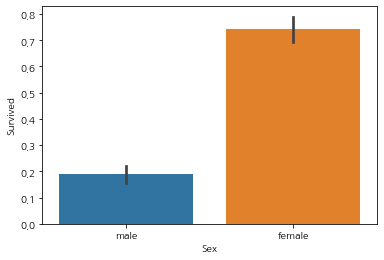

In [64]:
# 시각화
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

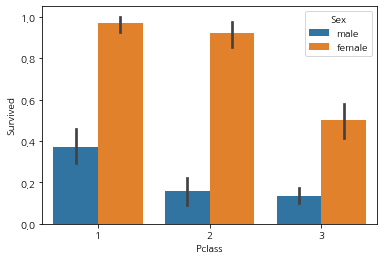

In [66]:
# 객실 등급 + 성별 생존 확률 확인 (성별 + 부에 따른 생존 확률)
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)
# 여성의 경우 1,2등실의 생존 확률 차이는 크지 않으나 3등실의 경우 생존률이 많이 떨어짐.
# 남성의 경우 1등실의 생존 확률이 2,3등실의 생존확률보다 더 높음.

In [67]:
# 나이에 따른 생존 확률
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <=5 : cat = 'Baby'
    elif age <=12 : cat = 'Child'
    elif age <=18 : cat = 'Teenager'
    elif age <=25 : cat = 'Student'
    elif age <=35 : cat = 'Young Adult'
    elif age <=60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

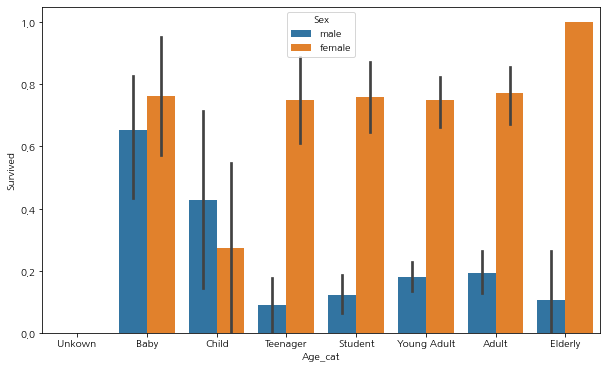

In [68]:
plt.figure(figsize=(10,6))

group_names = ['Unkown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)
# 여자 Elderly의 경우 생존 확률이 높음

- EDA를 통해 Sex, Age, Pclass 등이 중요하게 생존을 좌우하는 피처임을 어느정도 확인함.

In [69]:
# 문자열 카테고리 피처 숫자형 카테고리 피처로 변환
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [70]:
# 데이터 전처리 함수 생성

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

# 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [71]:
# 원본 데이터 재로딩 후 피처, 레이블 데이터 세트 추출
titanic_df = pd.read_csv('./train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [75]:
# 결정트리, 랜덤포레스트, 로지스틱 회귀 이용해 생존자 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도 : {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

DecisionTreeClassifier 정확도 : 0.8045
RandomForestClassifier 정확도 : 0.8436
LogisticRegression 정확도 : 0.8492


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
# K-Fold 교차검증
def exec_kfold(clf, folds=5): # 폴드 세트 5개인 KFold 객체 생성, 폴드 수 만큼 예측 결과 저장하기 위한 리스트 객체 생성
    kfold =KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        # 학습 및 예측
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        # 반복 시마다 정확도 측정
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('\n#{0} 교차 검증 정확도 :{1:.4f}'.format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print('평균 정확도 :',mean_score)
exec_kfold(dt_clf, folds=5)


#0 교차 검증 정확도 :0.7263

#1 교차 검증 정확도 :0.7809

#2 교차 검증 정확도 :0.7978

#3 교차 검증 정확도 :0.7528

#4 교차 검증 정확도 :0.8371
평균 정확도 : 0.778959261816584


In [79]:
# cross_val_score()로 교차검증
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print('\n#{0} 교차 검증 정확도 :{1:.4f}'.format(iter_count, accuracy))
mean_score = np.mean(scores)
print('평균 정확도 :',mean_score)


#0 교차 검증 정확도 :0.7318

#1 교차 검증 정확도 :0.7753

#2 교차 검증 정확도 :0.8034

#3 교차 검증 정확도 :0.7753

#4 교차 검증 정확도 :0.8202
평균 정확도 : 0.7812001757579561


In [80]:
# GridSearchCV로 최적 하이퍼 파라미터 찾아 예측 성능 측정
parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring = 'accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearhCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearhCV 최고 정확도 파라미터:', grid_dclf.best_score_)
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print(accuracy)

GridSearhCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearhCV 최고 정확도 파라미터: 0.7991825076332119
0.8715083798882681
